# Complete Example of Decision Tree & Random Forest

In [1]:
from sklearn import tree
import pandas as pd

In [2]:
# Read the csv file
df = pd.read_csv("Resources/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Prepare target data
target = df["Outcome"]
target_names = ["negative", "positive"]

In [5]:
# Prepare feature data
data = df.drop("Outcome", axis=1)
feature_names = data.columns
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
# Use train_test_split to create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
# Create a decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6875

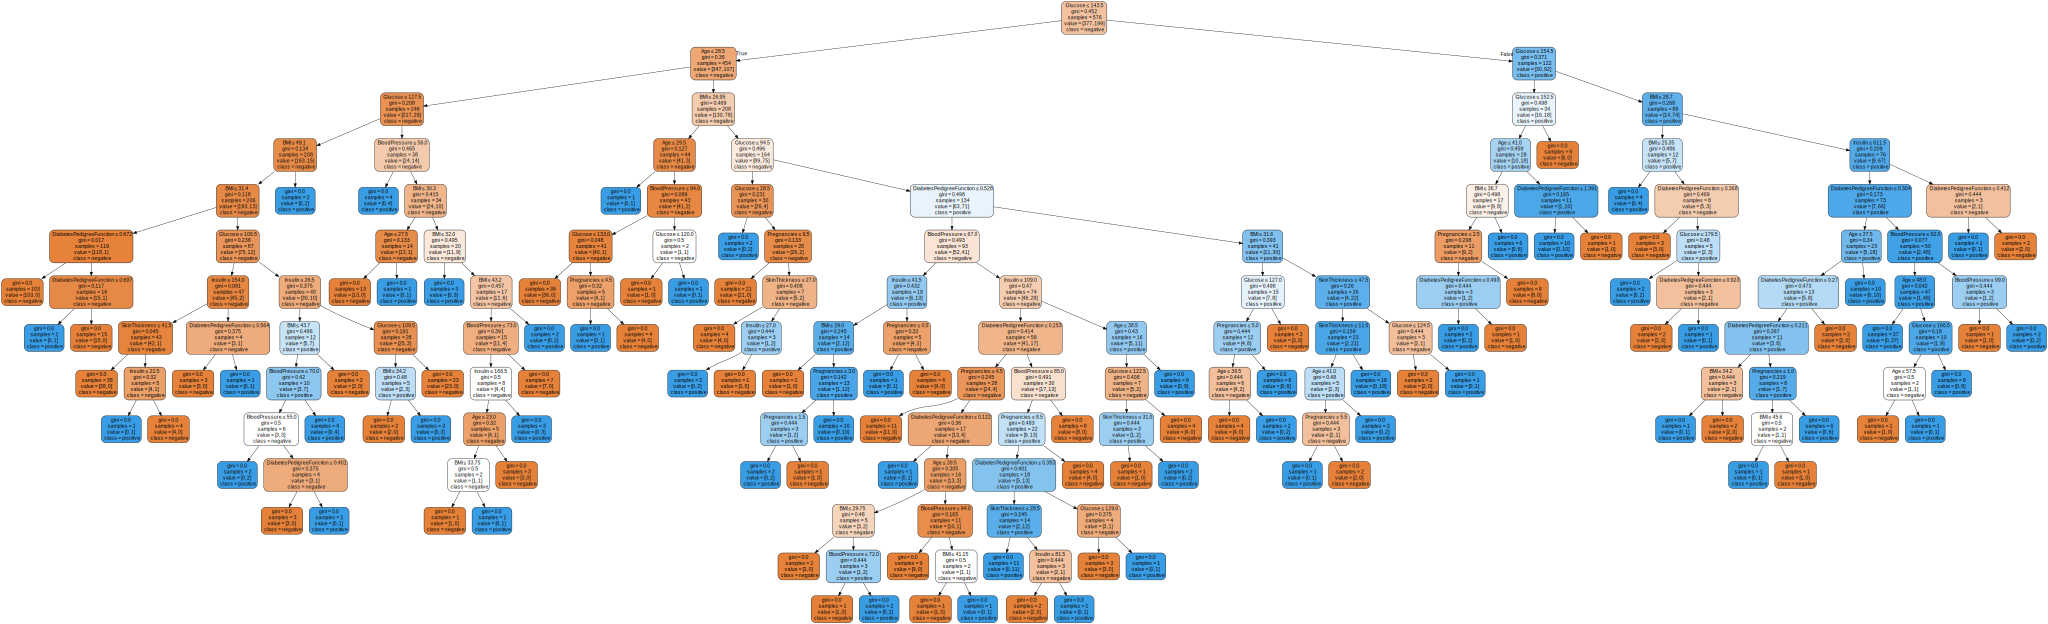

In [9]:
# Use graphviz to visualize the tree
import graphviz
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names = feature_names,
    class_names = target_names,
    filled=True, rounded=True,
    special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [10]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.75

In [11]:
# Sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.26596978736127386, 'Glucose'),
 (0.16435994472166157, 'BMI'),
 (0.14374014312141928, 'Age'),
 (0.11675973944671421, 'DiabetesPedigreeFunction'),
 (0.08615314622977283, 'BloodPressure'),
 (0.0782691076317969, 'Pregnancies'),
 (0.07315660342446638, 'Insulin'),
 (0.07159152806289489, 'SkinThickness')]